In [1]:
from transformers import pipeline

In [3]:
import transformers

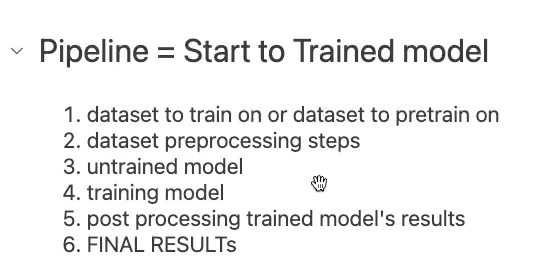

In [ ]:
model = pipeline("sentiment-analysis",
                 model_kwargs= {"force_download": True}
                 )   # we r giving the general purpose -> sent-analysis

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# above we r using force download because we did not specify the model here

In [ ]:
# use the model
model(["this was a good movie", "the product was ok"])

[{'label': 'POSITIVE', 'score': 0.9998570680618286},
 {'label': 'POSITIVE', 'score': 0.9997346997261047}]

In [ ]:
# also this model is improvable... means we can fine-tune
# check more examples but a bit confusing ones

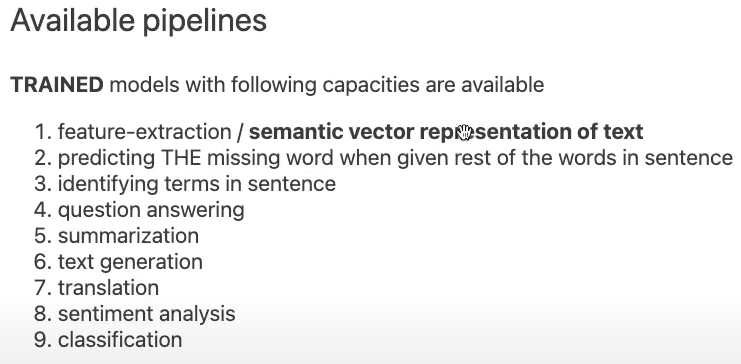

In [ ]:
categorization = pipeline("zero-shot-classification",
                          model_kwargs= {"force_download": True})

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
categorization(
    ["bio-tech experiment", "Nano-tech journal", "Land aquisition"],
    candidate_labels = ["biology", "law"]
    )

[{'sequence': 'bio-tech experiment',
  'labels': ['biology', 'law'],
  'scores': [0.9915024042129517, 0.008497551083564758]},
 {'sequence': 'Nano-tech journal',
  'labels': ['biology', 'law'],
  'scores': [0.5451052784919739, 0.45489469170570374]},
 {'sequence': 'Land aquisition',
  'labels': ['law', 'biology'],
  'scores': [0.9426384568214417, 0.05736156925559044]}]

# **Behind the pipepline**

In [ ]:
"""
the pipeline actually executes 3 steps:
1. preprocessing
2. passing the inputs through model
3. Post processing
""";

In [ ]:
# Tokenizer --> Model --> Post processing

In [ ]:
# preprocessing with tokenizer
# this should be done in the same way as when the model was pre trained
# we can download that info -> Model Hub

In [4]:
# to do this we use Autoencoder() class and from_pretrained() method

from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [5]:
raw_inputs = [
    "he tried his best.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True,
                   return_tensors="pt")
# return_tensors="pt" => type of tensor we r passing
print(inputs)

{'input_ids': tensor([[ 101, 2002, 2699, 2010, 2190, 1012,  102,    0],
        [ 101, 1045, 5223, 2023, 2061, 2172,  999,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}


In [6]:
# for above ->input_ids contains two rows of integers (one for each sentence)
# that are the unique identifiers of the tokens in each sentence.

In [7]:
# download the model
# We can download our pretrained model the same way we did with our tokenizer

from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [8]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

"""
When you use **inputs as an argument to the model, it unpacks the dictionary and
passes its key-value pairs as keyword arguments to the model function.

3d => batch_size(The number of sequences processed at a time (2 in our example).)
sequence length(The length of the numerical representation of the sequence (16 in our example))
hidden size(The vector dimension of each model input)
""";

torch.Size([2, 8, 768])


In [9]:
# elements by attributes
outputs[0]

tensor([[[ 0.2859,  0.4387, -0.5285,  ...,  0.5112,  0.7094, -0.3018],
         [ 0.6730,  0.8093, -0.3262,  ...,  0.2945,  1.1212, -0.4346],
         [ 0.4973,  0.2934, -0.4907,  ...,  0.1546,  0.9762, -0.4739],
         ...,
         [ 0.6784,  0.2270, -0.0192,  ...,  0.7225,  0.4480, -0.6587],
         [ 0.6555,  0.5987,  0.4953,  ...,  0.8206,  0.3694, -0.6378],
         [ 0.5979,  0.0116, -0.4781,  ...,  0.5221,  0.7505,  0.0426]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8988, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.2443,  0.7035, -0.1199,  ..., -0.3341, -0.9158,  0.1711],
         [-0.0289,  0.9006, -0.2142,  ..., -0.2135, -0.9266, -0.1390],
         [ 0.0472,  0.3603, -0.1729,  ..., -0.3191, -0.9299, -0.1047]]],
       grad_fn=<NativeLayerNormBackward0>)

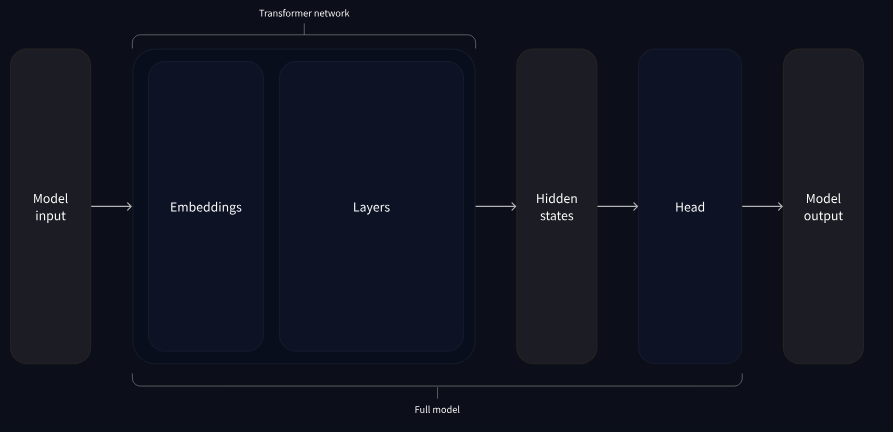

**the model heads take the high-dimensional vector of hidden states as input and project them onto a different dimension. They are usually composed of one or a few linear layers**

There are many different architectures available in 🤗 Transformers, with each one designed around tackling a specific task. Here is a non-exhaustive list:

    *Model (retrieve the hidden states)
    *ForCausalLM
    *ForMaskedLM
    *ForMultipleChoice
    *ForQuestionAnswering
    *ForSequenceClassification
    *ForTokenClassification

In [10]:

from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

AutoModelForSequenceClassification => This class retrieves the base model plus a sequence classification head on top of it

 while AutoModel gives you the raw hidden states, AutoModelForSequenceClassification provides the logits needed for classification by adding a specialized head. For a classification task like sentiment analysis, AutoModelForSequenceClassification is the correct and more direct choice.

In [11]:
print(outputs.logits.shape)

torch.Size([2, 2])


In [12]:
print(outputs.logits)

tensor([[-1.0352,  1.1120],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


Those are not probabilities but logits, the raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer

In [13]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[1.0460e-01, 8.9540e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [14]:
predicted_index = torch.argmax(predictions, dim = 1)
print(f"Predicted Index: {predicted_index}")

Predicted Index: tensor([1, 0])


In [15]:
model.config

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.55.0",
  "vocab_size": 30522
}

In [16]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [17]:
# Map the Index to its Label
id2label = {0: "No", 1: "Yes"}

# Look up the final label
final_labels = [id2label[idx.item()] for idx in predicted_index]
print(f"Final Label: {final_labels}")


Final Label: ['Yes', 'No']


# **loading pretrained Models**

Loading a Transformer model that is already trained is simple — we can do this using the from_pretrained() method

In [18]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# we could replace BertModel with the equivalent AutoModel class
# if your code works for one checkpoint, it should work seamlessly with another.
# This applies even if the architecture is different, as long as the checkpoint
# was trained for a similar task (for example, a sentiment analysis task).

**This model is now initialized with all the weights of the checkpoint. It can be used directly for inference on the tasks it was trained on, and it can also be fine-tuned on a new task. By training with pretrained weights rather than from scratch, we can quickly achieve good results.**

In [19]:
# saving the model

model.save_pretrained("save_dir")

# config.json and pytorch_model.bin these 2 files will be saved in the dir

In [ ]:
# config.json -> attributes necessary to build the model architecture
#  pytorch_model.bin file is known as the state dictionary; it contains all your model’s weights.

# **Tokenizer to model**

🤗 Transformers API can handle all of this for us with a high-level function that we’ll dive into here. When you call your tokenizer directly on the sentence, you get back inputs that are ready to pass through your model:

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

**model_inputs variable contains everything that’s necessary for a model to operate well. For DistilBERT, that includes the input IDs as well as the attention mask.**

In [ ]:
# also this method can tokenize a single sentence or multiple
# without the change in api

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences)

In [ ]:
# It can pad according to several objectives

In [ ]:
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

In [ ]:
# we can also truncate

sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)

In [ ]:
# From tokenizer to model ===>

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)